In [57]:
from typing import List
%env PROJECT_ROOT=/Users/nathanielbush/Devel/deep-learning-skunk-works

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

from src.config import CBOWConfig, SkipGramConfig
from src.skipgram import load_skip_gram_model, load_counter_stoi_and_itos
from src.cbow import InferenceServer, load_cbow_model, DataManager

env: PROJECT_ROOT=/Users/nathanielbush/Devel/deep-learning-skunk-works


In [58]:
def get_skip_gram_server():
  config = SkipGramConfig(model_date=SkipGramConfig.get_latest_model())
  _, stoi, _ = load_counter_stoi_and_itos(config.model_vocab_path)
  model = load_skip_gram_model(config.model_best_checkpoint_path, stoi, config)
  return InferenceServer(config, model, stoi)

def get_cbow_server():
  config = CBOWConfig(model_date=CBOWConfig.get_latest_model())
  data_manager = DataManager(config.batch_size)
  vocab = data_manager.read_vocab(config.model_vocab_path)
  model = load_cbow_model(config.model_best_checkpoint_path, vocab, config)
  return InferenceServer(config, model, vocab)

def plot_tsne(embeddings: np.ndarray, words: List[str], plot_title: str) -> None:
  embedded = TSNE(n_components=2).fit_transform(embeddings)
  x, y = zip(*[row for row in embedded])

  fig, ax = plt.subplots()
  plt.title(plot_title)
  ax.scatter(x, y, )
  for i, text in enumerate(words):
    ax.annotate(text, (x[i], y[i]))

In [59]:
def plot_tnse_for_word_groups(server, title):
  word_groups = [
    ['king', 'queen', 'man', 'woman'],
    ['teach', 'taught', 'walk', 'walked'],
    ['walk', 'walks', 'talk', 'talks'],
  ]
  for words in word_groups:
    tensors = [server.embed_word(w).detach().numpy() for w in words]
    plot_tsne(tensors, words, title)

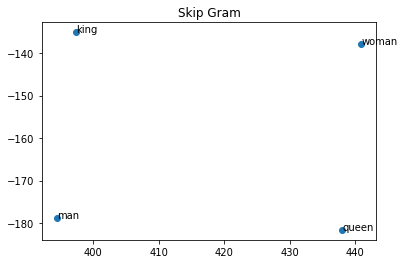

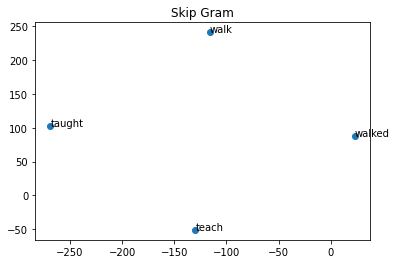

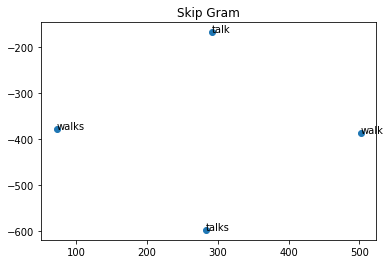

In [60]:
server = get_skip_gram_server()
plot_tnse_for_word_groups(server, 'Skip Gram')

server = get_cbow_server()
plot_tnse_for_word_groups(server, 'CBOW')